In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf


In [123]:
# import data
def get_data(stocks, start, end):
    tick = yf.Ticker(stocks)
    stockData = tick.history(start=start, end=end, interval='1d')
    stockData = stockData['Close']
    returns = stockData.pct_change()
    return returns

stockList = ['METV', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'MSFT']

endDate = dt.date.today()
startDate = endDate - dt.timedelta(days=300)

returns = []

for i, stock in enumerate(stockList):
    retur = get_data(stock, startDate, endDate)
    returns.append(pd.Series(retur, name=stock))
    
returns = pd.DataFrame(returns)

meanReturns = returns.T.mean()
covMatrix = (returns).T.cov()

weights = np.random.random(len(meanReturns))
weights /=np.sum(weights)

<function matplotlib.pyplot.show(close=None, block=None)>

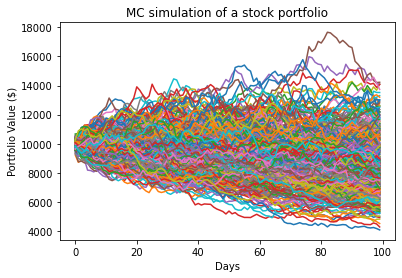

In [133]:
# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L,Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights,dailyReturns.T)+1)*initialPortfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show

In [87]:
startDate[:3]

TypeError: 'datetime.datetime' object is not subscriptable